# Test-retest reproducibility 
We first quantified the spatial reproducibility of parcels in `friends-s01` training and validation data. 
 * **Reproducibility measure.** A spatial correlation is generated for each pair of parcels, one in the training and one in the validation set. This spatial correlation is calculated within the union of the subject-specific grey matter mask from both parcellations. 
 * **Intra-subject reproducibility.** For each parcel in the training set, we report the maximal spatial correlation with any parcels of the validation. This process generates a distribution of intra-subject reproducibility across parcels. 
 * **Inter-subject reproducibility.** We also apply the same matching procedure, but comparing pairs of parcels coming from different subjects, within the training set. This generates a distribution of inter-subject reproducibility across parcels. 

```{admonition} Computational reproducibility 
The results for this experiment have been precomputed usin the scripts `bla` and `bla`. The following hidden block of code loads the necessary libraries to generate the figures, sets the path to find the pre-comupted results as well as some visualisation parameters.
```

In [1]:
import os
from cneuromod_embeddings import dypac_utils
from cneuromod_embeddings.repro_summary import repro_df
import seaborn as sns
import matplotlib.pyplot as plt

root_path, basename = os.path.split(dypac_utils.__file__)
root_data = os.path.join(root_path, 'friends-s01', 'repro_friends-s01')
val_repro = repro_df(root_data)
params = dypac_utils.dypac_params()
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

The following figure shows the distribution of intra- vs inter-subject parcel reproducibility for `fwhm=5`. The intra-subject reproducibility is very high for all paramaters, with median reproducibility above 0.9 in all cases. The inter-subject reproducibility is substantially lower than intra-subject reproducibility, with slightly higher median and variance for larger `cluster` and `state`. Overall, the largest (and near-perfect) separation intra- vs inter-subject is observed for `cluster-20_state-60`, indicating that the major states of large distributed networks are more subject-specific than local functional regions.

Text(0.5, 1.0, 'FWHM=5 all subjects pooled')

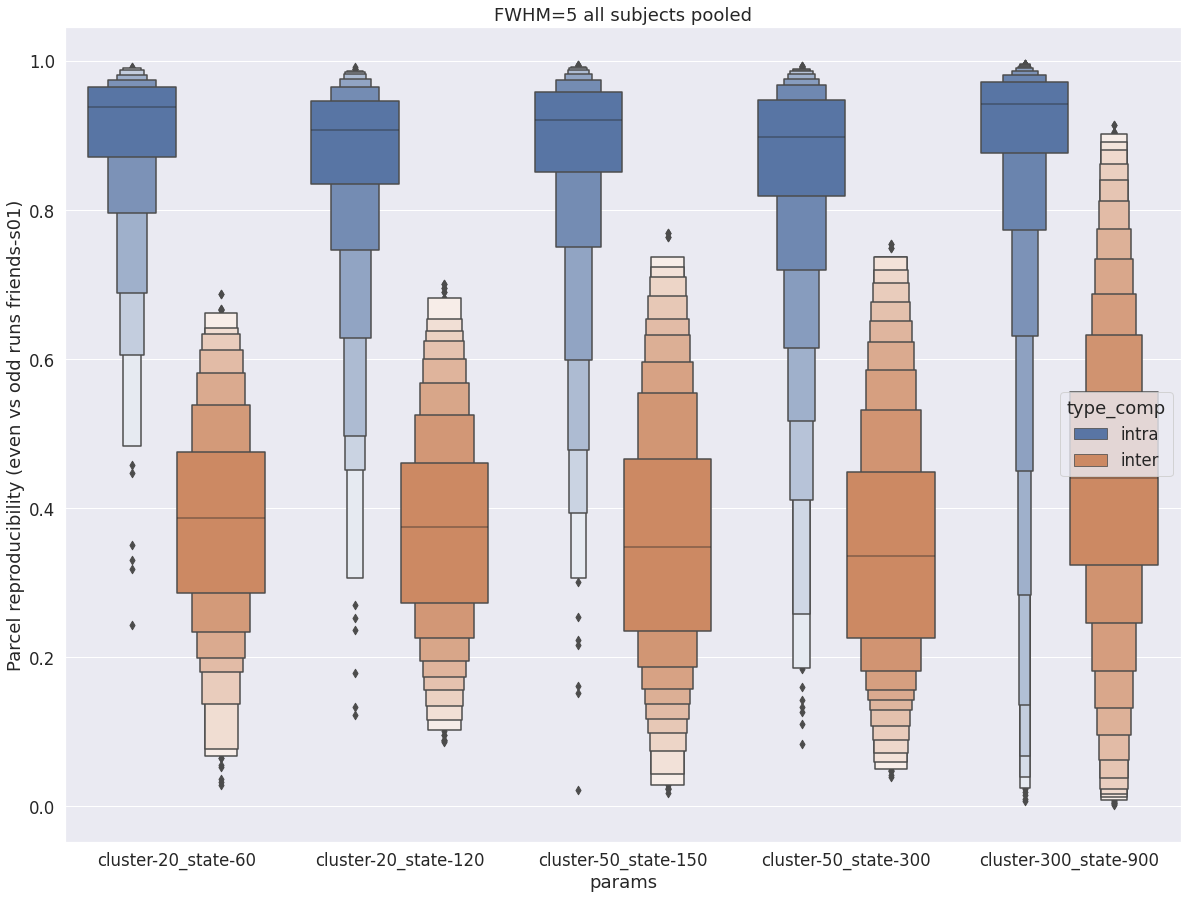

In [2]:
fwhm=5
fig = plt.figure(figsize=(20, 15))
data = val_repro[val_repro['fwhm']==fwhm]
sns.boxenplot(data=data, x='params', y='spatial_r', hue='type_comp', scale='area')
plt.ylabel('Parcel reproducibility (even vs odd runs friends-s01)')
plt.title(f'FWHM={fwhm} all subjects pooled')

Repeating the experiment with `fhwm=8` leads to similar conclusions, with two notable differences: (1) the distributions of intra-subject reproducibility gets tighter, (2) inter-subject reproducibility increases, and susbstantially overlaps intra-subject distribution for `cluster-300_state-900`. This suggests that higher levels of spatial blurring help stabilize the dynamic parcels, but also removes some subject-specific details.

Text(0.5, 1.0, 'FWHM=8 all subjects pooled')

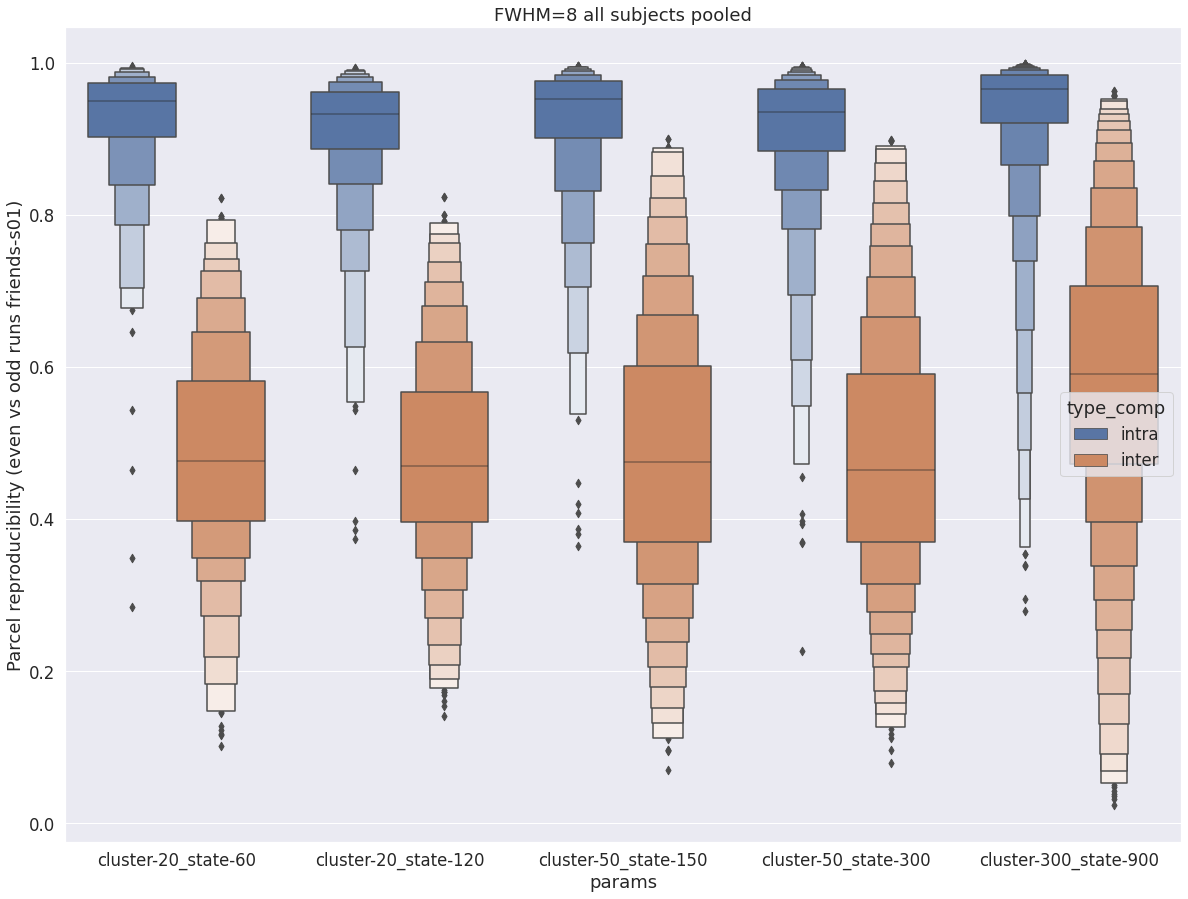

In [3]:
fwhm=8
fig = plt.figure(figsize=(20, 15))
data = val_repro[val_repro['fwhm']==fwhm]
sns.boxenplot(data=data, x='params', y='spatial_r', hue='type_comp', scale='area')
plt.ylabel('Parcel reproducibility (even vs odd runs friends-s01)')
plt.title(f'FWHM={fwhm} all subjects pooled')

Finally, for a given set of parameters, it is possible to further break down the reproducibility distributions per subject, which is shown in the following supplementary figures. The intra- vs inter-subject distribution of spatial reproducibility is strikingly consistent across subjects, both for `fwhm=5` and for `fwhm=8`.

/home/pbellec/env/cneuromod_embeddings/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/pbellec/env/cneuromod_embeddings/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/home/pbellec/env/cneuromod_embeddings/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/pbellec/env/cneuromod_embeddings/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/home/pbellec/env/cneuromod_embeddings/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


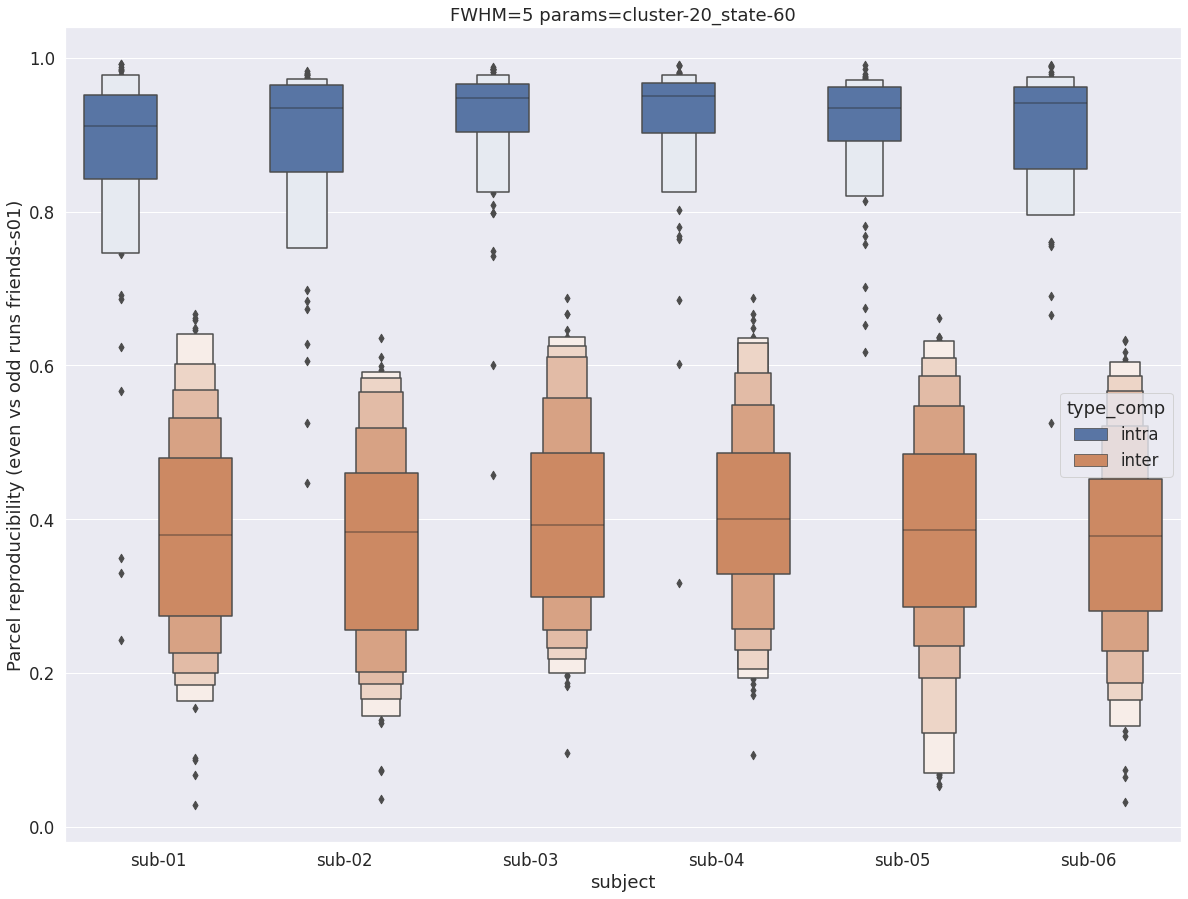

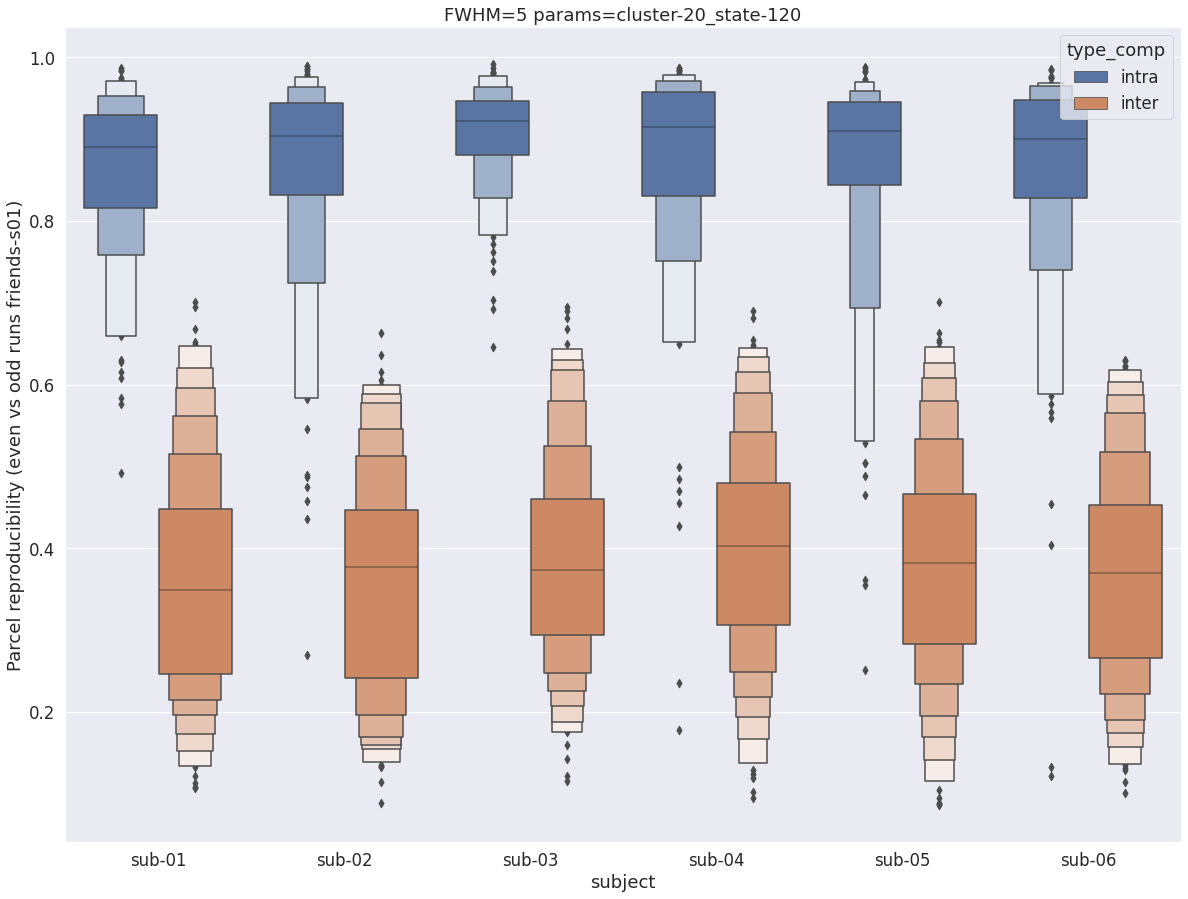

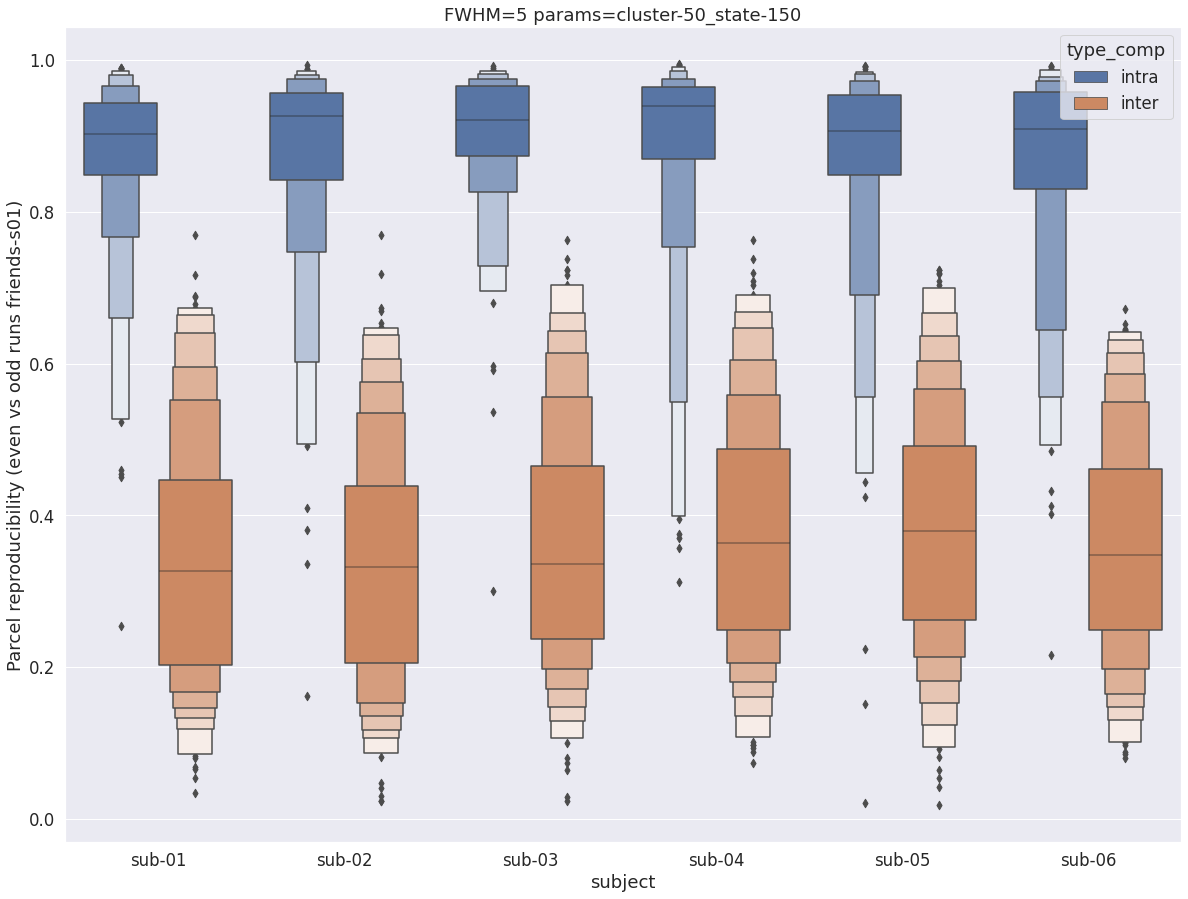

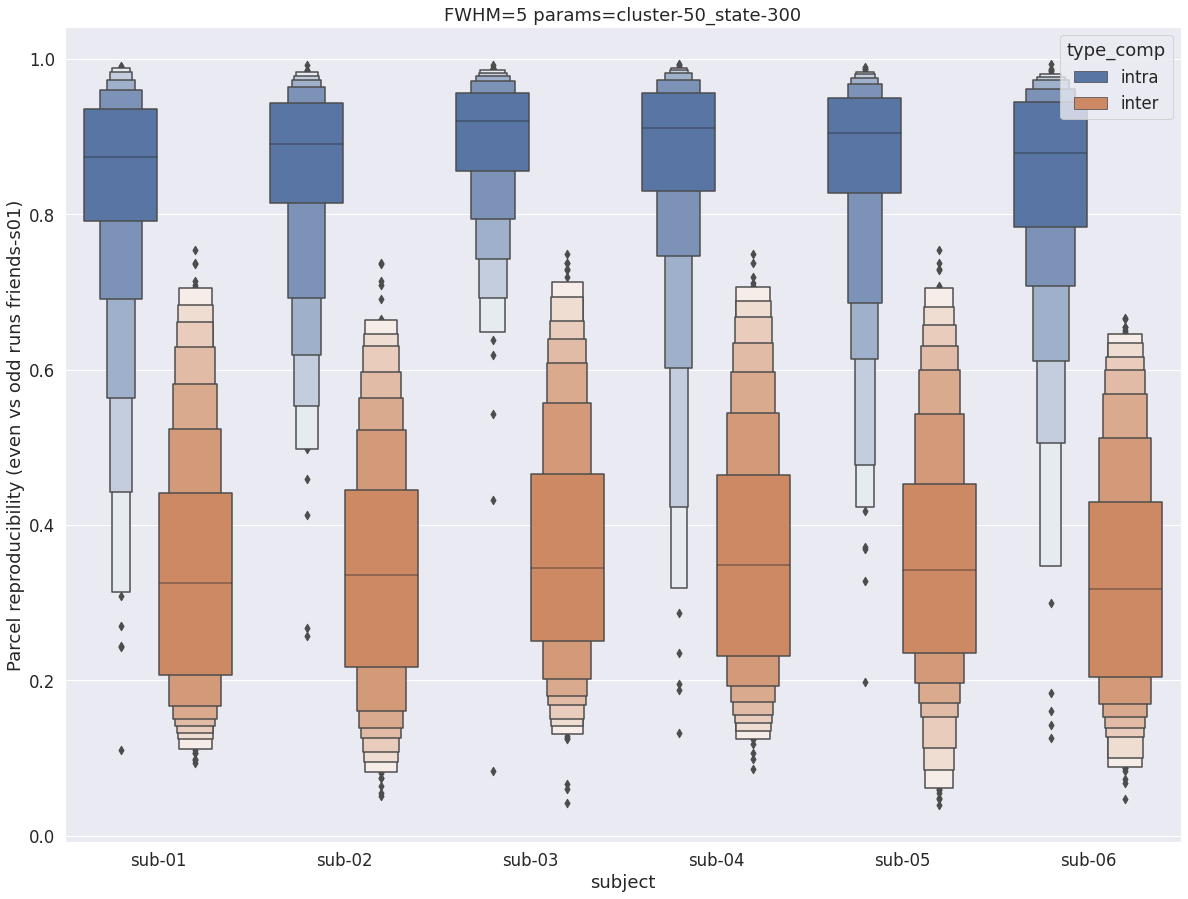

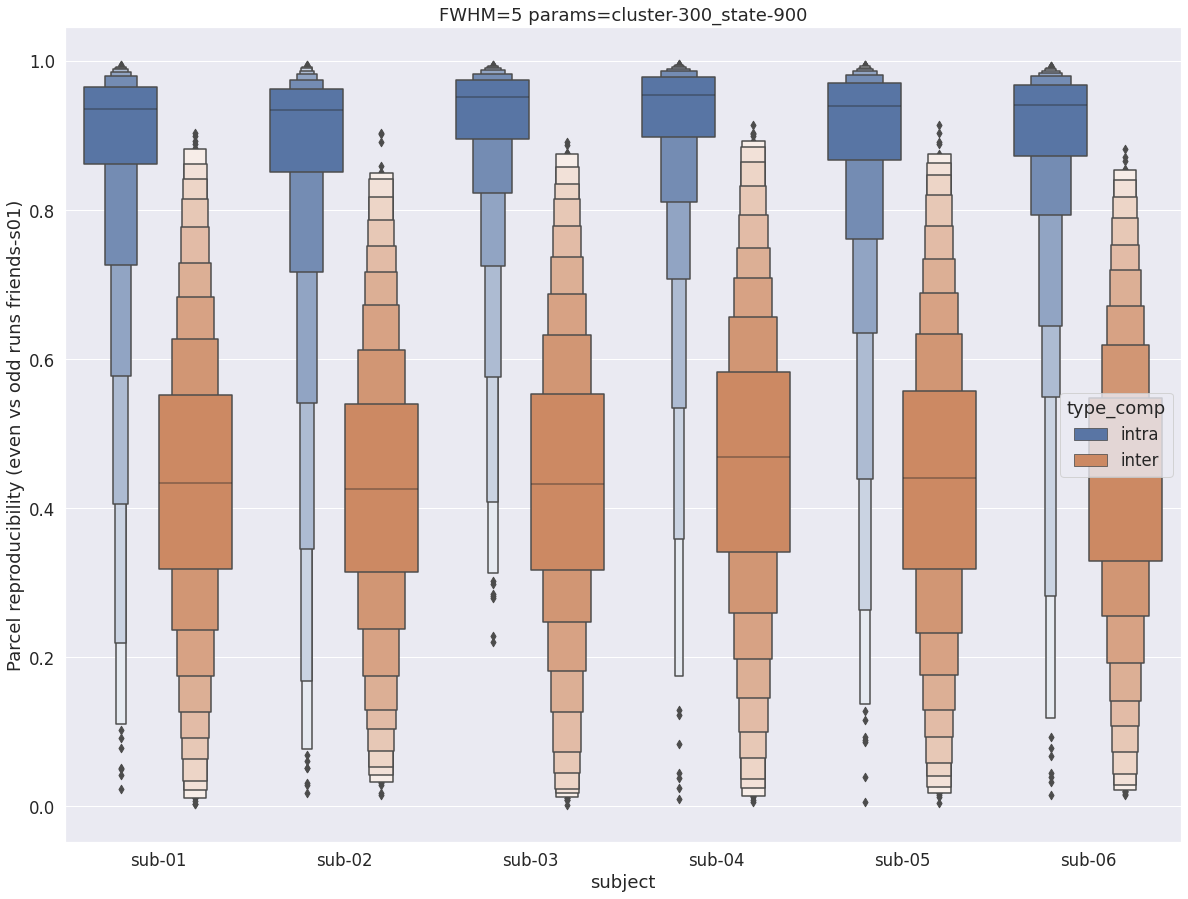

In [4]:
fwhm=5
for ind, cluster in enumerate(params['cluster']):
    state = params['state'][ind]
    key = f'cluster-{cluster}_state-{state}' 
    fig = plt.figure(figsize=(20, 15))
    data = val_repro[val_repro['fwhm']==fwhm][val_repro['params']==key]
    sns.boxenplot(data=data, x='subject', y='spatial_r', hue='type_comp', scale='area')
    plt.ylabel('Parcel reproducibility (even vs odd runs friends-s01)')
    plt.title(f'FWHM={fwhm} params={key}')

/home/pbellec/env/cneuromod_embeddings/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/pbellec/env/cneuromod_embeddings/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/home/pbellec/env/cneuromod_embeddings/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/pbellec/env/cneuromod_embeddings/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/home/pbellec/env/cneuromod_embeddings/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


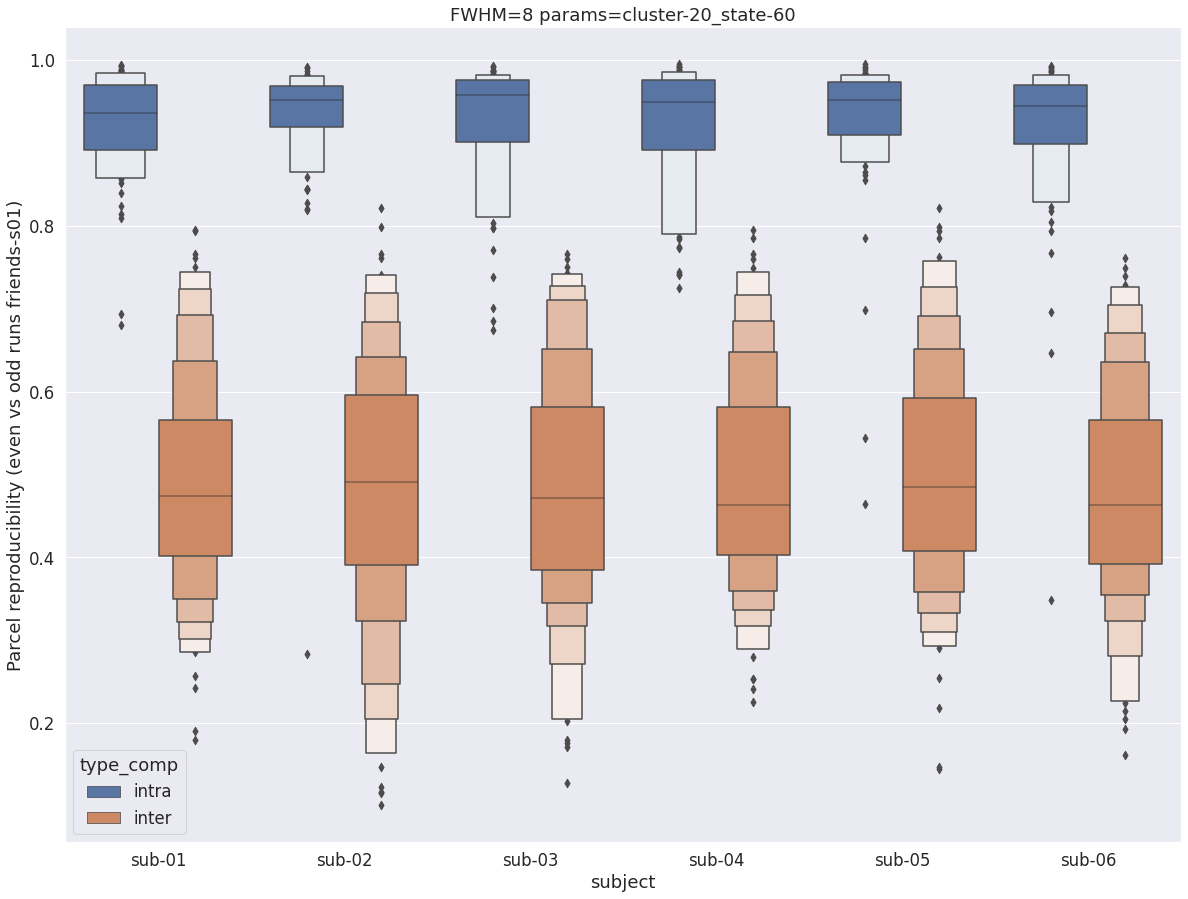

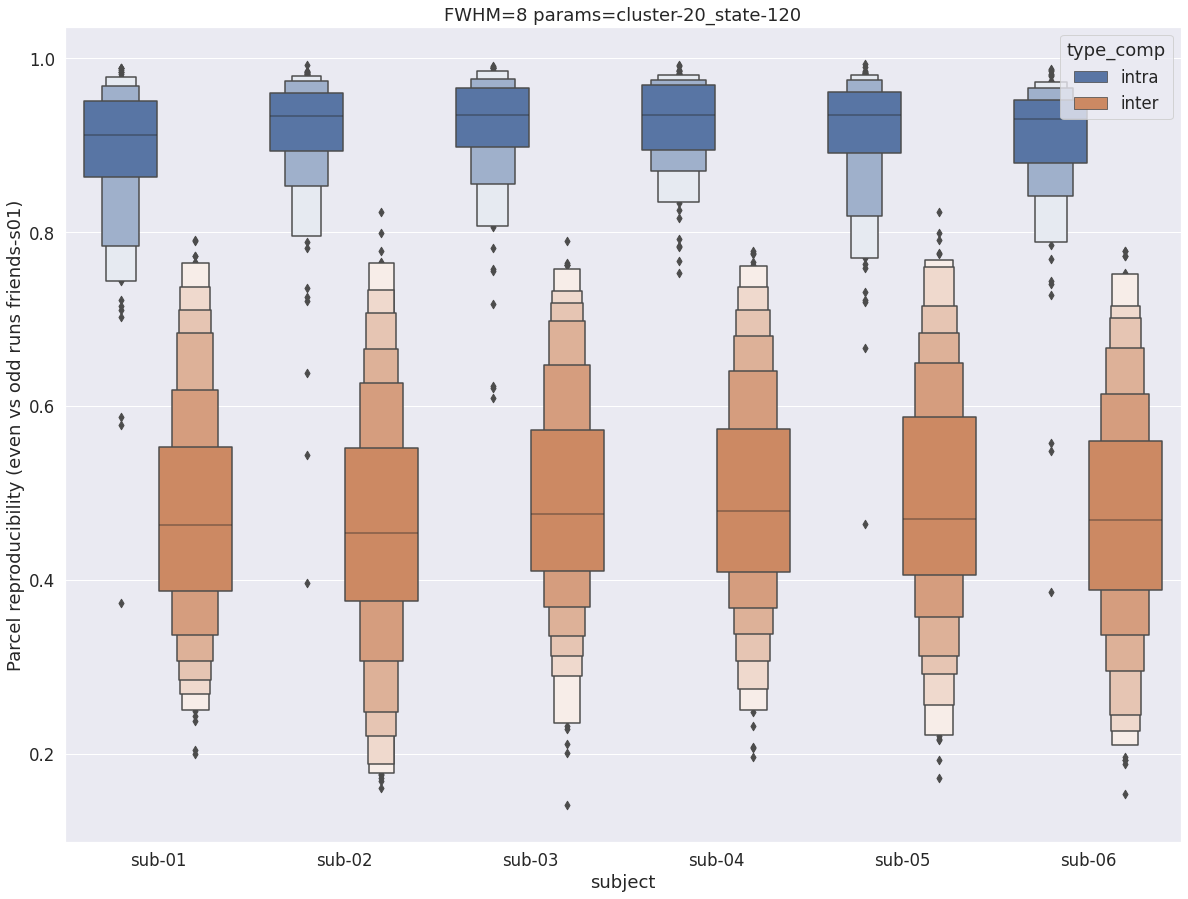

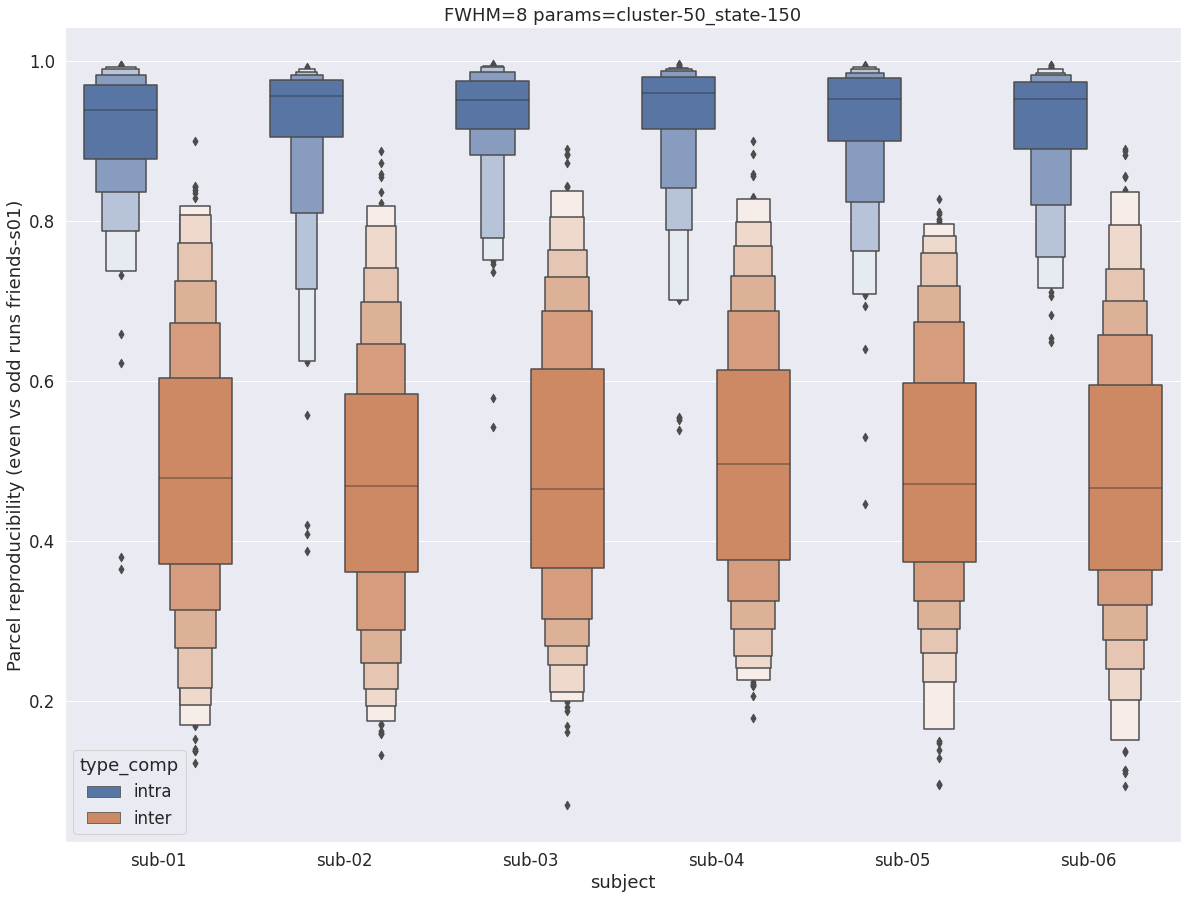

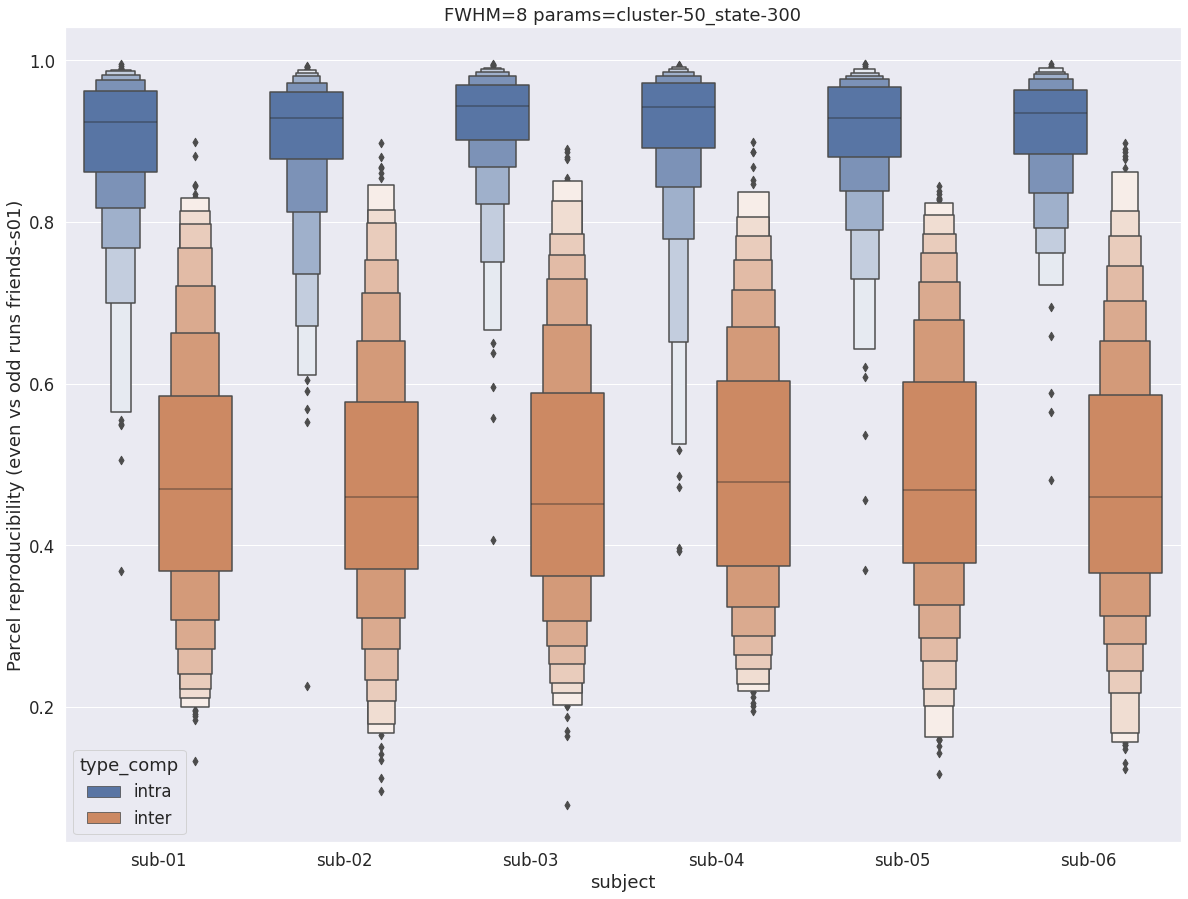

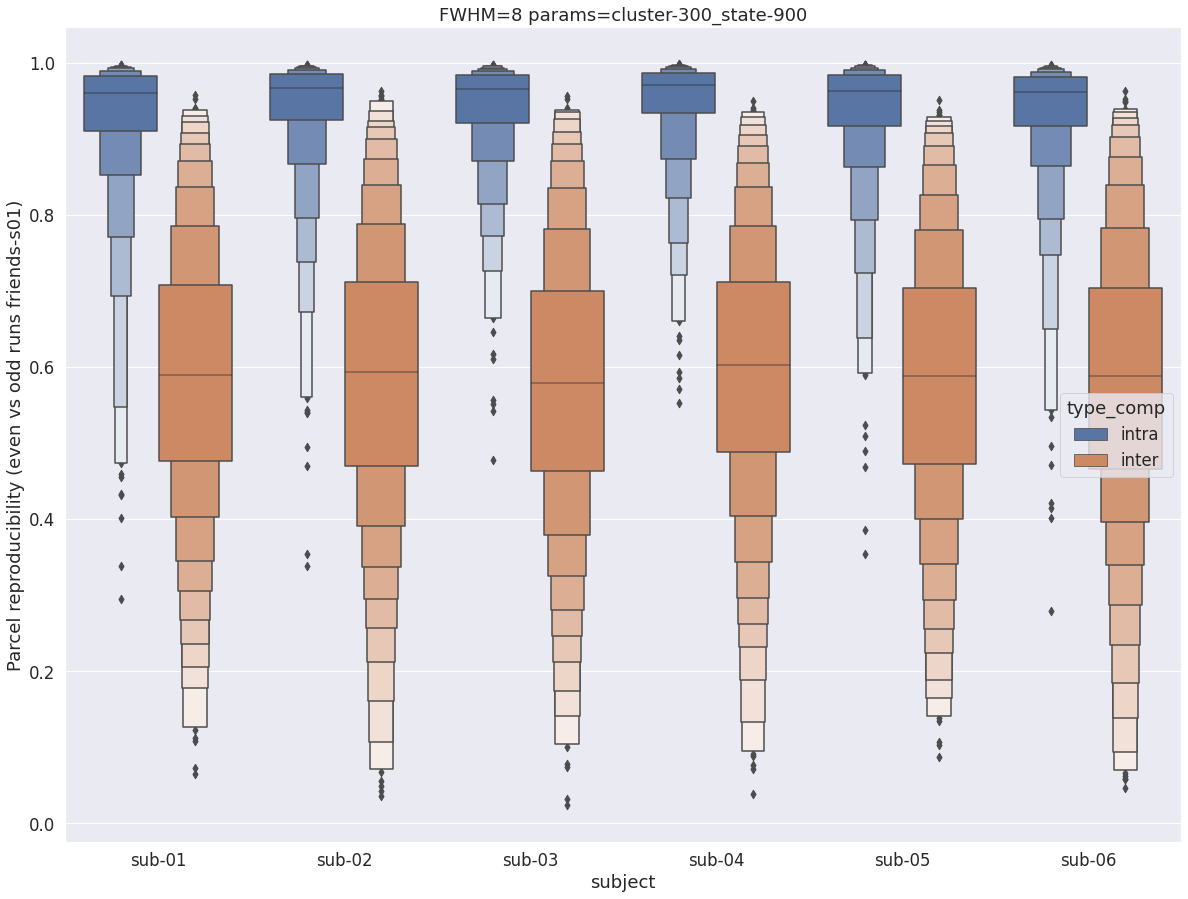

In [5]:
fwhm=8
for ind, cluster in enumerate(params['cluster']):
    state = params['state'][ind]
    key = f'cluster-{cluster}_state-{state}' 
    fig = plt.figure(figsize=(20, 15))
    data = val_repro[val_repro['fwhm']==fwhm][val_repro['params']==key]
    sns.boxenplot(data=data, x='subject', y='spatial_r', hue='type_comp', scale='area')
    plt.ylabel('Parcel reproducibility (even vs odd runs friends-s01)')
    plt.title(f'FWHM={fwhm} params={key}')